In [1]:
import os
os.environ["DEV"] = "1"
from invertedai_drive import drive
from invertedai_drive.utils import MapLocation
from IPython.display import Image
from PIL import Image as PImage
import imageio
import torch
import numpy as np
import matplotlib
import cv2

In [ ]:
maps = [
    "Town06_Merge_Double", "Town06_Merge_Single", "Town01_Straight", "Town02_Straight", "Town04_Merging",
]
@dataclass
class config:
    location = random.choice(maps)
    agent_count = 30
    batch_size = 1
    obs_length = 1
    step_times = 1
    min_speed = 10
    max_speed = 20

In [14]:
response = drive.initialize(
    location=config.location,
    agent_count=config.agent_count,
    batch_size=config.batch_size,
    min_speed=config.min_speed,
    max_speed=config.max_speed,
)

In [15]:
initial_condition = response['initial_condition']

In [16]:
initial_states = initial_condition['agent_states']

In [17]:
agent_sizes = initial_condition['agent_sizes']

In [18]:
x=initial_states['x']
y=initial_states['y']
psi=initial_states['psi']
speed=initial_states['speed']
length=agent_sizes['length']
width=agent_sizes['width']
lr=agent_sizes['lr']
recurrent_states=None
frames = []
for t in range(10):
    drive_response = drive.run(api_key='',
                               location=MapLocation.Town03_Roundabout, 
                               x=x,
                               y=y, 
                               psi=psi, 
                               speed=speed,
                               length=length,
                               width=width,
                               lr=lr,
                               batch_size=1, agent_counts=10, obs_length=1,
                               step_times=1,
                               recurrent_states=recurrent_states,
                               return_birdviews=True)
    states = drive_response.states
    x=states.x[0]
    y=states.y[0]
    psi=states.psi[0]
    speed=states.speed[0]
    recurrent_states = np.array(drive_response.recurrent_states)[0, :, :, 0, ...].tolist()
    birdview=np.array(drive_response.bird_view, dtype=np.uint8)                                                                                   
    image = cv2.imdecode(birdview, cv2.IMREAD_COLOR)
    frames.append(image)
    im = PImage.fromarray(image)
imageio.mimsave(
            'test.gif', np.array(frames),
            format="GIF-PIL"
        )

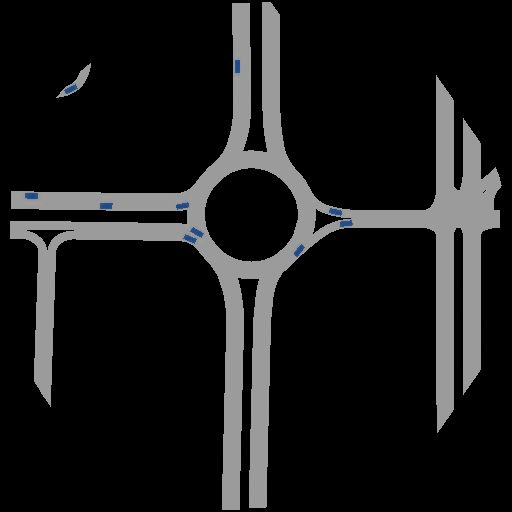

In [19]:
Image('test.gif')